In [ ]:
# Write at least three observations or inferences that can be made from the data.
# drug testing was distributed fairly quually between mouse genders.
# Capomulin showed better results than Ceftamin.
# there apears to be a positive coorelation between patient weight and average tumor volume. 

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
study_data_complete.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
5,h246,0,45.0,0,Ketapril,Male,13,30
6,p189,0,45.0,0,Ketapril,Male,8,28
7,n923,0,45.0,0,Ketapril,Male,19,30
8,q119,0,45.0,0,Ketapril,Male,17,30
9,f993,0,45.0,0,Naftisol,Male,21,28


In [8]:
# Checking the number of mice.
len(study_data_complete ["Mouse ID"])

1893

In [9]:
#Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateID = study_data_complete [study_data_complete.duplicated()]
duplicateID

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.0,0,Propriva,Female,21,26


In [10]:
# Optional: Get all the data for the duplicate mouse ID. 
DuplicateMouse = study_data_complete.loc[study_data_complete["Mouse ID"] == "g989", :]
DuplicateMouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [11]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicateDropped=study_data_complete.drop(study_data_complete.loc[study_data_complete["Mouse ID"] == "g989", :].index)
duplicateDropped.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [12]:
# Checking the number of mice in the clean DataFrame.
len(duplicateDropped["Mouse ID"].unique())

248

## Summary Statistics

In [13]:
means = duplicateDropped.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
medians = duplicateDropped.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
var  = duplicateDropped.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
sds = duplicateDropped.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
sems = duplicateDropped.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
summaryTable = pd.DataFrame({
    "Mean Tumor Vol": means,
    "Median Tumor Vol": medians,
    "Tumor Vol  Variance": var,
    "Tumor Vol Std Dev.": sds,
    "Tumor Vol Std Err.": sems
    })
summaryTable

,Mean Tumor Vol,Median Tumor Vol,Tumor Vol Variance,Tumor Vol Std Dev.,Tumor Vol Std Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:
SummaryClean = duplicateDropped.groupby("Drug Regimen").agg({
"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
SummaryClean

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

summary =duplicateDropped.groupby(["Drug Regimen"])
summaryDF = summary.agg({
"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})       

summaryDF

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

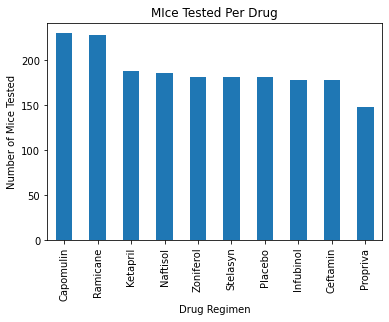

<Figure size 432x288 with 0 Axes>

In [16]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
numberTested = duplicateDropped["Drug Regimen"].value_counts()



numberTested.plot(kind="bar", title="MIce Tested Per Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()
plt.tight_layout()

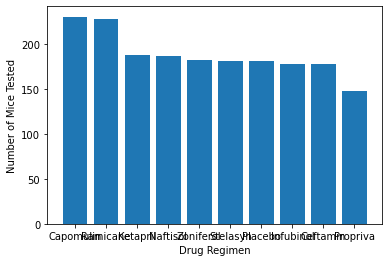

In [17]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
plt.bar(numberTested.index.values, numberTested.values)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()


<AxesSubplot:title={'center':'Sex Tested Per Drug'}, ylabel='Sex'>

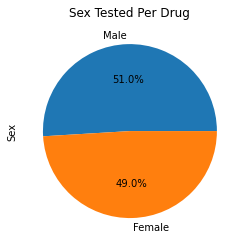

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
CountS = duplicateDropped['Sex'].value_counts()
#CountS

CountS.plot(kind="pie", autopct="%1.1f%%", title="Sex Tested Per Drug")

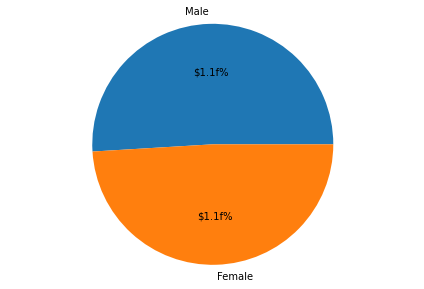

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(CountS.values, labels=CountS.index.values, autopct="$1.1f%%")
plt.axis("equal")
plt.tight_layout()
plt.show()

## Quartiles, Outliers and Boxplots

In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


lastGreatestTimepoint= duplicateDropped.groupby("Mouse ID")["Timepoint"].max()
lastGreatestTimepoint = lastGreatestTimepoint.reset_index()
#lastGreatestTimepoint.head()


## Merge this group df with the original dataframe to get the tumor volume at the last timepoint 
mergedTimepoint = lastGreatestTimepoint.merge(duplicateDropped, on=["Mouse ID", "Timepoint"], how="left")
mergedTimepoint.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [23]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    finalTumorVol = mergedTimepoint.loc[mergedTimepoint["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    finalTumorVol = mergedTimepoint.loc[mergedTimepoint["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_list.append(finalTumorVol)
    
    # Determine outliers using upper and lower bounds
    quartiles = finalTumorVol.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lowerbound = lowerq - (1.5 * iqr)
    upperbound = upperq + (1.5 * iqr)
    outliers = finalTumorVol.loc[(finalTumorVol < lowerbound) | (finalTumorVol > upperbound)]
    
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


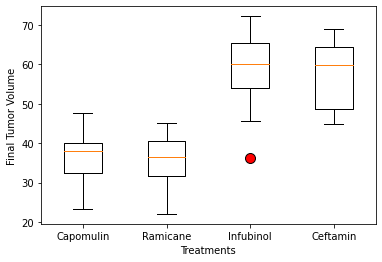

In [24]:
orange_out = dict(markerfacecolor="r", markersize=10)
plt.boxplot(tumor_vol_list, labels=treatment_list, flierprops=orange_out)
plt.xlabel("Treatments")
plt.ylabel("Final Tumor Volume")
plt.show()

## Line and Scatter Plots

In [25]:
CapomulinTable = duplicateDropped.loc[duplicateDropped["Drug Regimen"]=="Capomulin"]
CapomulinTable.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
226,j246,0,45.0,0,Capomulin,Female,21,21
227,r554,0,45.0,0,Capomulin,Female,8,17
228,s185,0,45.0,0,Capomulin,Female,3,17
229,b742,0,45.0,0,Capomulin,Male,7,21


<function matplotlib.pyplot.show(close=None, block=None)>

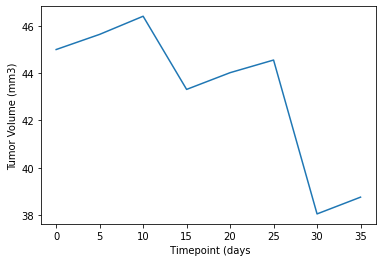

In [26]:
patientX =CapomulinTable.loc[CapomulinTable["Mouse ID"]=="j246"]
plt.plot(patientX["Timepoint"], patientX["Tumor Volume (mm3)"] )
plt.xlabel(" Timepoint (days")
plt.ylabel("Tumor Volume (mm3)")
plt.show

In [27]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_avg = CapomulinTable.groupby("Mouse ID").mean()
Capomulin_avg.head()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Mouse ID,,,,,
b128,22.5,41.963636,0.7,9.0,22.0
b742,22.5,40.083699,0.0,7.0,21.0
f966,10.0,36.505973,0.0,16.0,17.0
g288,22.5,41.990097,0.8,3.0,19.0
g316,22.5,44.613344,1.0,22.0,22.0


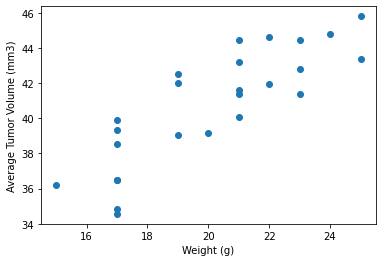

In [30]:
plt.scatter(Capomulin_avg["Weight (g)"],Capomulin_avg["Tumor Volume (mm3)"] )
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

 the coorelation between patient weight and average tumor vol is 0.84


<function matplotlib.pyplot.show(close=None, block=None)>

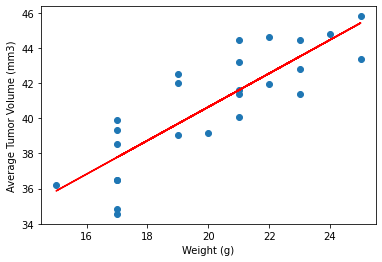

In [35]:
correlation = round(st.pearsonr(Capomulin_avg["Weight (g)"],Capomulin_avg["Tumor Volume (mm3)"])[0], 2)
print(f" the coorelation between patient weight and average tumor vol is {correlation:.2f}")
      
model = st.linregress(Capomulin_avg["Weight (g)"],Capomulin_avg["Tumor Volume (mm3)"]) 
#print (model)

yValues = Capomulin_avg["Weight (g)"] * model[0] + model[1] 
           
plt.scatter(Capomulin_avg["Weight (g)"],Capomulin_avg["Tumor Volume (mm3)"] )
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

           
plt.plot (Capomulin_avg["Weight (g)"], yValues, color="r")        
plt.show
